In [7]:
import spynnaker8 as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt
n_neurons = 100
simtime = 1000
inp1 = [simtime/8*5,simtime/8*6,simtime/8*7,simtime/8*8]
inp2 = [simtime/8*3,simtime/8*4,simtime/8*7,simtime/8*8]
inp3 = [simtime/8*2,simtime/8*4,simtime/8*6,simtime/8*8]
xor = [simtime/8*3,simtime/8*5,simtime/8*7]
sim.setup(timestep=1)
pre_pop = sim.Population(n_neurons,sim.IF_curr_exp(),label="Pre")
post_pop = sim.Population(n_neurons,sim.IF_curr_exp(),label="Post")
pre_noise = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp1),label="Noise_Pre")
pre_noise2 = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp2),label="Noise_Pre2")
post_noise = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp1),label="Noise_Post")
post_noise2 = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp2),label="Noise_Post2")
pre_noise_rand = sim.Population(n_neurons,sim.SpikeSourcePoisson(rate=10.0),label="Noise_Pre_rand")
post_noise_rand = sim.Population(n_neurons,sim.SpikeSourcePoisson(rate=10.0),label="Noise_Post_rand")
pre_pop.record(["spikes",'v'])
post_pop.record(["spikes",'v'])
%matplotlib inline

2022-05-11 23:47:50 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-05-11 23:47:50 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-05-11 23:47:50 WARNING: /home/bbpnrsoa/reports has 11 old reports that have not been closed
2022-05-11 23:47:50 INFO: Setting time scale factor to 1.
2022-05-11 23:47:50 INFO: Setting machine time step to 1000 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


In [8]:

training = sim.Population(n_neurons, sim.SpikeSourceArray(spike_times=xor),label="Training")
#sim.Projection(pre_noise,pre_pop,sim.OneToOneConnector(),
#              synapse_type=sim.StaticSynapse(weight=2.0))
#sim.Projection(post_noise,post_pop,sim.OneToOneConnector(),
#              synapse_type=sim.StaticSynapse(weight=2.0))
#sim.Projection(pre_noise2,pre_pop,sim.OneToOneConnector(),
#              synapse_type=sim.StaticSynapse(weight=2.0))
#sim.Projection(post_noise2,post_pop,sim.OneToOneConnector(),
#              synapse_type=sim.StaticSynapse(weight=2.0))
sim.Projection(pre_noise_rand,pre_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0,delay=1.0))
sim.Projection(post_noise_rand,post_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0,delay=1.0))
sim.Projection(training,pre_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=5.0,delay=5.0))
sim.Projection(training,post_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=5.0,delay=5.0))

sim.Projection(post_pop,post_pop,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=2.0))
sim.Projection(pre_pop,pre_pop,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=2.0))

projection from pre Pre to post Pre with connector OneToOneConnector()

In [9]:
timing_rule = sim.SpikePairRule(tau_plus=20.0,tau_minus=20.0,A_plus=0.5,A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0,w_min=0.0)
stdp_model = sim.STDPMechanism(timing_dependence=timing_rule,weight_dependence=weight_rule,
                              weight=0.0,delay=3.0)
stdp_projection = sim.Projection(pre_pop,post_pop,sim.OneToOneConnector(),synapse_type=stdp_model)

In [10]:
sim.run(simtime)
pre_neo = pre_pop.get_data(variables=["spikes"])
pre_spikes = pre_neo.segments[0].spiketrains
post_neo = post_pop.get_data(variables=["spikes"])
post_spikes = post_neo.segments[0].spiketrains
pre_v = pre_pop.get_data("v")
post_v = post_pop.get_data("v")
print(stdp_projection.getWeights())
sim.end()


2022-05-11 23:47:51 INFO: Starting execution process
2022-05-11 23:47:51 INFO: Simulating for 1000 1.0ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
|0%                          50%                         100%|
2022-05-11 23:47:51 INFO: Time 0:00:00.017455 taken by SpynnakerSplitterSelector
Adding delay extensions as required
|0%                          50%                         100%|
2022-05-11 23:47:51 INFO: Time 0:00:00.013809 taken by DelaySupportAdder
2022-05-11 23:47:54 INFO: Time 0:00:03.227259 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-05-11 23:48:03 INFO: Time 0:00:08.838260 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-05-

[0.         4.89501953 4.00244141 0.63574219 5.         5.
 0.         4.02294922 1.18408203 5.         4.00244141 5.
 3.99169922 4.19677734 5.         5.         3.4765625  2.15087891
 0.         2.15087891 5.         2.26171875 2.88818359 5.
 0.         5.         3.40917969 3.54492188 2.15087891 3.91210938
 3.61279297 2.15087891 3.70849609 0.         5.         1.94580078
 2.26171875 5.         5.         5.         1.59277344 4.3515625
 5.         5.         5.         5.         3.89160156 5.
 0.         5.         3.84863281 2.69042969 5.         1.59277344
 2.37792969 5.         2.83789062 2.81494141 5.         5.
 5.         0.         1.94580078 5.         0.         5.
 2.82470703 4.00244141 5.         5.         5.         3.41650391
 0.         3.79736328 4.11328125 3.33007812 0.36962891 0.
 5.         1.94580078 5.         4.09667969 3.30029297 1.76123047
 0.         0.         4.96582031 5.         5.         0.
 1.8515625  4.52099609 3.99169922 2.92333984 3.03564453 5.
 

/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argum

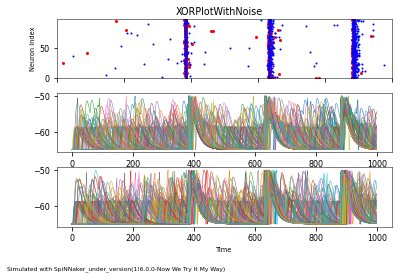

In [11]:
line_properties = [{'color': 'r','markersize':4},{'color': 'b','markersize':2}]
plt.figure()
plot.Figure(
    # plot spikes
    plot.Panel(pre_spikes, post_spikes, yticks=True, xlim=(0, simtime),line_properties = line_properties),
    plot.Panel(pre_v.segments[0].filter(name='v')[0],yticks=True,xticks=True,legend=None,xlabel="Time"),
    plot.Panel(post_v.segments[0].filter(name='v')[0],yticks=True,xticks=True,legend=None,xlabel="Time"),
    title="XORPlotWithNoise",
    annotations="Simulated with {}".format(sim.name())
).save("XORPlotWithNoise")

plt.show()
